## Web scraping to fetch the S&P 500 Capitl data

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetching the data from Slickcharts
url = "https://www.slickcharts.com/sp500"  # URL of the data source

# Mimic a browser request by setting the User-Agent
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.5938.62 Safari/537.36"
    )
}

# Make the request with headers
response = requests.get(url, headers=headers, verify=False)

# Suppress warnings from unverified HTTPS requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

if response.status_code == 200:
    print("Successfully fetched the data!")
    print(response.text[:100])  # Print the first 500 characters of the response
else:
    print(f"Failed to fetch the data. Status code: {response.status_code}")
    response.raise_for_status()



Successfully fetched the data!
<!doctype html>
<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=


## Parsing the data to extract the table 

In [6]:
# Step 2: Parsing the data
# We use pandas to parse HTML tables on the website
tables = pd.read_html(response.text)
sp500_table = tables[0]  # The first table on the page contains the S&P 500 data

# Display the first few rows of the table to understand its structure
print(sp500_table.head())



   #                       Company Symbol Weight   Price   Chg     % Chg
0  1                    Apple Inc.   AAPL  7.63%  258.75  0.55   (0.21%)
1  2                   Nvidia Corp   NVDA  6.73%  140.24  0.02   (0.02%)
2  3                Microsoft Corp   MSFT  6.39%  439.14 -0.19  (-0.04%)
3  4                Amazon.com Inc   AMZN  4.19%  227.90 -1.15  (-0.50%)
4  5  Meta Platforms, Inc. Class A   META  2.59%  603.15 -4.60  (-0.76%)


C:\Users\yegan\AppData\Local\Temp\ipykernel_47268\3173867680.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


## Reconfiguring the data in the table for analysis

In [8]:
# Step 3: Extracting relevant columns
# The columns we need are 'Company', 'Symbol', and 'Weight' (the market cap)
market_cap_column = "Weight"  
sp500_table[market_cap_column] = (
    sp500_table[market_cap_column]
    .replace("[\%,]", "", regex=True)  # Remove $ and commas
    .astype(float)
)
# Step 4: Sorting by Weight
sp500_table = sp500_table.sort_values(by=market_cap_column, ascending=False)
print(sp500_table.head())


   #                       Company Symbol  Weight   Price   Chg     % Chg
0  1                    Apple Inc.   AAPL    7.63  258.75  0.55   (0.21%)
1  2                   Nvidia Corp   NVDA    6.73  140.24  0.02   (0.02%)
2  3                Microsoft Corp   MSFT    6.39  439.14 -0.19  (-0.04%)
3  4                Amazon.com Inc   AMZN    4.19  227.90 -1.15  (-0.50%)
4  5  Meta Platforms, Inc. Class A   META    2.59  603.15 -4.60  (-0.76%)


<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
C:\Users\yegan\AppData\Local\Temp\ipykernel_47268\376511100.py:6: SyntaxWarning: invalid escape sequence '\%'
  .replace("[\%,]", "", regex=True)  # Remove $ and commas


## Calculating cumulative percentages

In [13]:
# Step 5: Calculating cumulative percentages
sp500_table["Cumulative Weight"] = sp500_table[market_cap_column].cumsum()
total_market_cap = sp500_table[market_cap_column].sum()
sp500_table["Cumulative %"] = (
    sp500_table["Cumulative Weight"] / total_market_cap * 100
)

# Step 6: Preparing data for plotting
sp500_table["Company Rank"] = range(1, len(sp500_table) + 1)


## Plotting the accumulated histogram

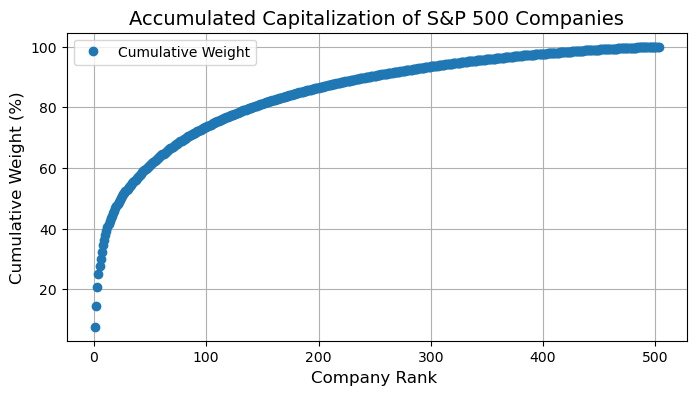

In [19]:
# Step 7: Plotting the accumulated histogram
plt.figure(figsize=(8, 4))
plt.plot(
    sp500_table["Company Rank"],
    sp500_table["Cumulative %"],
    marker="o",
    linestyle="",
    label="Cumulative Weight",
)

# Step 8: Adding labels and title
plt.title("Accumulated Capitalization of S&P 500 Companies", fontsize=14)
plt.xlabel("Company Rank ", fontsize=12)
plt.ylabel("Cumulative Weight (%)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

